In [1]:
import torch
import matplotlib.pyplot as plt
import torch
from importlib import reload 
from pathlib import Path 

from unlearning.datasets import gaussian 

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'



def check_memory():
    print(f"Memory Allocated: {torch.cuda.memory_allocated() / 1024 ** 2} MB")
    print(f"Max Memory Allocated: {torch.cuda.max_memory_allocated() / 1024 ** 2} MB")
    print(f"Memory Cached: {torch.cuda.memory_reserved() / 1024 ** 2} MB")
    print(f"Max Memory Cached: {torch.cuda.max_memory_reserved() / 1024 ** 2} MB")  


BASE_DIR = Path("/n/home04/rrinberg/data_dir__sneel/Lab/rrinberg/results")

# Example usage:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


from unlearning import probes, leace, plotting
reload(probes)
reload(plotting)
reload(leace)
# Select device: use CUDA if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Create a random dataset with 100 samples and 5 features on the selected device
torch.manual_seed(42)



Using device: cuda
Using device: cuda


okay, now that a linear probe is set up, let's test the accuracy on different layers in a real model
# setting up a real model 

Files already downloaded and verified
Files already downloaded and verified


/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


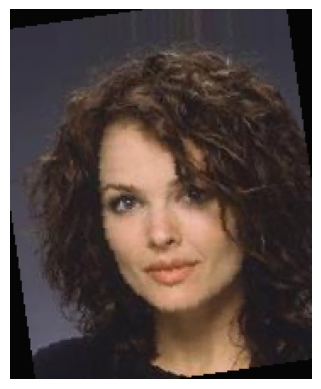

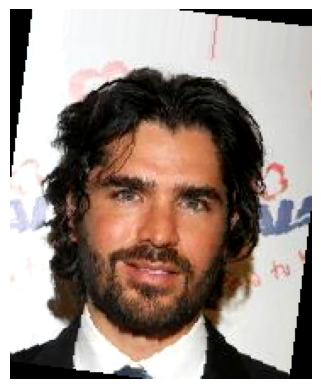

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CelebA
import torchvision.datasets as datasets
from unlearning import model_utils
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np 

from torch.utils.data import DataLoader, Subset
import json
import yaml  
def save_yaml(params, filename):
    with open(filename, 'w') as file:
        yaml.dump(params, file)

import pickle 
def save_pickle(params, filename):
    with open(filename, 'wb') as file:
        pickle.dump(params, file)
from pathlib import Path    



DATA_DIR = Path("/n/home04/rrinberg/data_dir/data_to_concept/")

# ========================
# 2. DATA LOADING
# ========================
transform = transforms.Compose([
    #transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),  # Augmentation: Flip images randomly
    transforms.RandomRotation(10),  # Augmentation: Small rotations
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Color jittering
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

NUM_WORKERS = 4
train_dataset = CelebA(root=DATA_DIR, split="train", transform=transform, download=True, target_type="attr")
val_dataset = CelebA(root=DATA_DIR, split="valid", transform=transform, download=True, target_type="attr")


BATCH_SIZE= 1024
    
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)



from unlearning import plotting
reload(plotting)

pos_index = 0
neg_index = 1

image_ = val_dataset[pos_index][0]
plotting.show_image(image_)

image_ = val_dataset[neg_index][0]
plotting.show_image(image_)

In [3]:
print(f"load model:")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MPS device
if torch.backends.mps.is_available():
    DEVICE = torch.device("mps")
print("Using device:", DEVICE)


model = model_utils.load_model(attr_index=1, models_dir=BASE_DIR / "models_without_labels__multiple", DEVICE = DEVICE)


print(f"evaluate model:")
all_preds, all_labels = model_utils.evaluate(model, val_loader, max_rounds = 5)



vals = [(model_utils.get_TP_TN_FP_FN(i, all_labels, all_preds)[0]) for i in range(40)]



model_layer_count = probes.get_layer_count(model)
print(f"layer count - {model_layer_count}")

# print model accuracy
accuracy = (all_preds == all_labels).float().mean()

#

load model:
Using device: cuda


/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/model_utils.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.m

evaluate model:


 25%|██▌       | 5/20 [00:59<02:59, 11.96s/it]


layer count - 10


In [4]:
for i, attr_name in enumerate(train_dataset.attr_names):
    print(f"attribute {i} - {attr_name}")


model_attribute_ind = 0
probe_attribute_index = 13


print(f"attribute = {train_dataset.attr_names[attribute_index]}")
model = model_utils.load_model(attr_index=model_attribute_ind, models_dir=BASE_DIR / "models_without_labels__multiple", DEVICE = DEVICE)

layer_count = probes.get_layer_count(model)
layer_ind = layer_count - 2


attribute 0 - 5_o_Clock_Shadow
attribute 1 - Arched_Eyebrows
attribute 2 - Attractive
attribute 3 - Bags_Under_Eyes
attribute 4 - Bald
attribute 5 - Bangs
attribute 6 - Big_Lips
attribute 7 - Big_Nose
attribute 8 - Black_Hair
attribute 9 - Blond_Hair
attribute 10 - Blurry
attribute 11 - Brown_Hair
attribute 12 - Bushy_Eyebrows
attribute 13 - Chubby
attribute 14 - Double_Chin
attribute 15 - Eyeglasses
attribute 16 - Goatee
attribute 17 - Gray_Hair
attribute 18 - Heavy_Makeup
attribute 19 - High_Cheekbones
attribute 20 - Male
attribute 21 - Mouth_Slightly_Open
attribute 22 - Mustache
attribute 23 - Narrow_Eyes
attribute 24 - No_Beard
attribute 25 - Oval_Face
attribute 26 - Pale_Skin
attribute 27 - Pointy_Nose
attribute 28 - Receding_Hairline
attribute 29 - Rosy_Cheeks
attribute 30 - Sideburns
attribute 31 - Smiling
attribute 32 - Straight_Hair
attribute 33 - Wavy_Hair
attribute 34 - Wearing_Earrings
attribute 35 - Wearing_Hat
attribute 36 - Wearing_Lipstick
attribute 37 - Wearing_Necklac

NameError: name 'attribute_index' is not defined

# Let's do iterative GA on the probes

In [37]:
# copy the model
import copy
original_model = copy.deepcopy(model)

In [ ]:
# TODO - solve for negative indices and positive indices


In [38]:
from torch.utils.data import Dataset

class CustomLabeledDataset(Dataset):
    def __init__(self, base_dataset, indices, custom_labels):
        self.base_dataset = base_dataset
        self.indices = indices
        self.custom_labels = custom_labels

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        data, _ = self.base_dataset[self.indices[idx]]  # Ignore original label
        label = self.custom_labels[idx]
        return data, label
    




def eval_probe(model, probe_model, val_probe_loader, device, max_steps = None):
    # evaluate probe model on val:
    probe_model.eval()
    correct = 0
    total = 0
    report_every = (len(val_probe_loader) // 10) +1
    with torch.no_grad():
        for val_step, (images, labels) in enumerate(val_probe_loader):
            if val_step % report_every == 0:
                print(f"val step - {val_step}/ {len(val_probe_loader)}")
            if max_steps and (val_step > max_steps):
                break 

            embeddings = []
            for image in images:
                embedding = probes.get_flattened_embedding(model, layer_ind=layer_ind, x=image.unsqueeze(0).to(device))
                embeddings.append(embedding)
            embeddings = torch.cat(embeddings, dim=0)
            
            outputs = probe_model(embeddings)
            predicted = (outputs > 0.5).float()
            
            total += labels.size(0)
            correct += (predicted.squeeze() == labels.to(device)).sum().item()
    return correct, total


def train_probe(probe_model, model, probe_dataset, probe_labels, layer_ind, device):
    embedding_dataset =[]
    for ii, (image, label) in enumerate(probe_dataset):
        embedding = probes.get_flattened_embedding(model, layer_ind=layer_ind, x=image.unsqueeze(0).to(device))
        embedding_dataset.append((embedding, label))
        if ii % (len(probe_dataset)//10) == 0:
            print(f"embedding {ii}/{len(probe_dataset)}")

    embedding_dataset= torch.cat([x[0] for x in embedding_dataset], dim=0)
    embedding_dataset.shape
    #probe_model = probes.MLP(input_dim=embedding_size, hidden_dim=128)
    #probe_model = probe_model.to(device)


    probe_acc, probe_model = probes.train_model(probe_model, embedding_dataset, probe_labels, num_epochs=100)
    
    return probe_model




pt_count = min(len(pos_indices), len(neg_indices), pt_count)
probe_indices = torch.concat((pos_indices[:pt_count], neg_indices[:pt_count]), dim=0)
probe_labels = torch.concat([torch.ones(pt_count), torch.zeros(pt_count)], dim=0)

probe_dataset = CustomLabeledDataset(
    base_dataset=train_dataset,
    indices=probe_indices,
    custom_labels=probe_labels
)

# create val probe dataset :
val_probe_indices = torch.concat((val_pos_indices[:val_N], val_neg_indices[:val_N]), dim=0)
val_probe_labels = torch.concat([torch.ones(val_N), torch.zeros(val_N)], dim=0)
val_probe_dataset = CustomLabeledDataset(
    base_dataset=val_dataset,
    indices=val_probe_indices,
    custom_labels=val_probe_labels
)

from torch.utils.data import DataLoader

probe_loader = DataLoader(probe_dataset, batch_size=64, shuffle=True, num_workers=4)

val_probe_loader = DataLoader(val_probe_dataset, batch_size=64, shuffle=True, num_workers=4)

In [39]:
reload(probes)
# load model 
print(f"model_attribute_ind - {model_attribute_ind}")
model = model_utils.load_model(attr_index=model_attribute_ind, models_dir=BASE_DIR / "models_without_labels__multiple", DEVICE = DEVICE)


model_attribute_ind - 0


/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/n/home04/rrinberg/code/data_to_concept_unlearning/unlearning/model_utils.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.m

In [ ]:
# 
reload(probes)
layer_ind = 8
### set up an MLP probe


embedding_size = probes.get_embedding_size(model, layer_ind = layer_ind)

probe_model = probes.MLP(input_dim=embedding_size, hidden_dim=128)
probe_model = probe_model.to(device)

probe_model = train_probe(probe_model, model, probe_dataset, probe_labels, layer_ind, device)
correct, total = eval_probe(model, probe_model, val_probe_loader, device, max_steps = 6)

print(f"valuation : Accuracy of the probe model on the validation set: {100 * correct / total:.2f}%")

# print the train set acc:
correct, total = eval_probe(model, probe_model, probe_loader, device, max_steps = 6)
print(f"train : Accuracy of the probe model on the train set: {100 * correct / total:.2f}%")



model_device: cuda:0
embedding 0/2000
embedding 200/2000
embedding 400/2000
embedding 600/2000
embedding 800/2000
embedding 1000/2000
embedding 1200/2000
embedding 1400/2000


## Do GA based on probe directly


In [158]:
def get_flattened_embedding__model(model: nn.Module, x: torch.Tensor, layer_ind: int):
    embeddings = []
    model_device = next(model.parameters()).device
    x = x.to(model_device)

    def hook(module, input, output):
        embeddings.append(output)

    layers = list(model.children())

    if layer_ind < 0 or layer_ind >= len(layers):
        raise ValueError(f"layer_num must be between 0 and {len(layers)-1}")

    handle = layers[layer_ind].register_forward_hook(hook)

    # Forward pass (without torch.no_grad()!)
    model(x)

    handle.remove()

    embedding = embeddings[0].flatten(start_dim=1)  # ← NO detach()

    return embedding



def freeze_all_but_layer_by_index(model, unfreeze_layer_inds):
    """
    Freeze all layers except the one at the given index from model.children().

    Args:
        model: the ResNet model.
        layer_ind: integer index from model.children() specifying the layer to unfreeze.
                   (Typically, 4:layer1, 5:layer2, 6:layer3, 7:layer4 in ResNet)
    """

    # Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False


    for layer_ind, layer in enumerate(model.named_children()):

        if layer_ind in unfreeze_layer_inds:
            print(f"unfreezing layer {layer_ind}")
            for param in layer[1].parameters():
                param.requires_grad = True



#optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
#SGD for GA
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# train model, freeze probe
for param in model.parameters():
    param.requires_grad = True

for param in probe_model.parameters():
    param.requires_grad = False

print(f"layer_ind- {layer_ind}")

freeze_layers= [layer_ind-1, layer_ind]

freeze_all_but_layer_by_index(model, freeze_layers)

# count unfrozen params
unfrozen_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Unfrozen parameters count: {unfrozen_params}")


model.train()
probe_model.eval()  # Probe is frozen (eval mode recommended)

report_every = (len(probe_loader) // 5) +1

# Let's try doing Gradient Ascent on the model parameters

break_out = False
for epoch in range(8):  # Train for a few epochs
    for probe_ind, (images, labels) in enumerate(probe_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass through model to get embeddings
        embeddings = get_flattened_embedding__model(model, images, layer_ind=layer_ind)

        # Forward pass through probe (frozen)
        predictions = probe_model(embeddings)
        # squeeze predictions
        predictions = predictions.squeeze()

        # predictions 
        # Compute loss
        loss = criterion(predictions, labels)
        ascent_loss = -1 * loss
        ascent_loss.backward()
        # Backward pass: updates model only, probe is frozen
        #loss.backward()
        optimizer.step()
        if probe_ind % report_every == 0:
            print(f"Epoch [{epoch + 1}], Step [{probe_ind + 1}/{len(probe_loader)}], Loss: {loss.item():.4f}")
        if loss > 2.:
            break_out= True
            break
    print(f"{epoch} -- Loss: {loss.item():.4f}")
    if loss < 0.001 or break_out:
        break





layer_ind- 8
unfreezing layer 7
unfreezing layer 8
Unfrozen parameters count: 14964736


/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1], Step [1/32], Loss: 0.4932
Epoch [1], Step [8/32], Loss: 0.3616
Epoch [1], Step [15/32], Loss: 0.6507
Epoch [1], Step [22/32], Loss: 0.9242
Epoch [1], Step [29/32], Loss: 0.9618
0 -- Loss: 1.0066
Epoch [2], Step [1/32], Loss: 0.9443
Epoch [2], Step [8/32], Loss: 1.4061
1 -- Loss: 1.5597


In [159]:
print(f"probe accuracy")
correct, total = eval_probe(model, probe_model, probe_loader, device, max_steps =10)
print(f"total - {total}; correct - {correct}")
print(f"Accuracy of the model on the train set: {100 * correct / total:.2f}%")

# evaluate on val
print(f"val probe accuracy")
correct, total = eval_probe(model, probe_model, val_probe_loader, device, max_steps =10)
print(f"total - {total}; correct - {correct}")
print(f"Accuracy of the model on the validation set: {100 * correct / total:.2f}%")

probe accuracy
evaluate probe model on val:
val step - 0/ 32
val step - 4/ 32
val step - 8/ 32
total - 704; correct - 481
Accuracy of the model on the train set: 68.32%
val probe accuracy
evaluate probe model on val:
val step - 0/ 32
val step - 4/ 32
val step - 8/ 32
total - 704; correct - 463
Accuracy of the model on the validation set: 65.77%


  0%|          | 0/20 [00:00<?, ?it/s]/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


 60%|██████    | 12/20 [00:53<00:35,  4.43s/it]


----


 60%|██████    | 12/20 [00:53<00:35,  4.42s/it]


---


Text(0.5, 1.0, 'Model Accuracy Before and After running GA on probe accuracy')

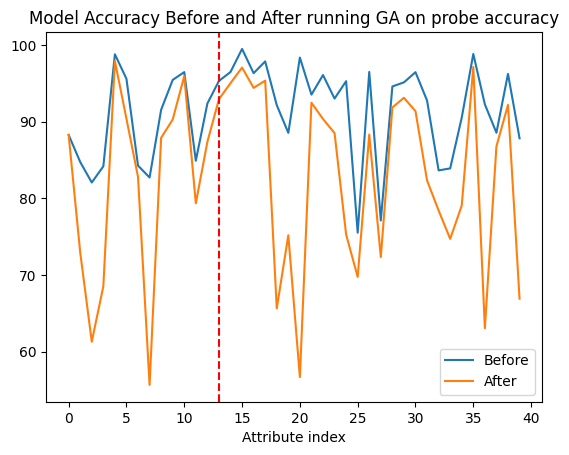

In [160]:
# test model accuracy in general
max_rounds= 12
all_preds, all_labels = model_utils.evaluate(model, val_loader, max_rounds = max_rounds)
# plot bars
vals = [(model_utils.get_TP_TN_FP_FN(i, all_labels, all_preds)[0]) for i in range(40)]
vals = np.array(vals)

print(f"----")
accs_after = [plotting.compute_precision_recall_acc(val)[2] for val in vals]

original_preds, original_labels = model_utils.evaluate(original_model, val_loader, max_rounds = max_rounds)
original_vals = [(model_utils.get_TP_TN_FP_FN(i, original_labels, original_preds)[0]) for i in range(40)]
original_vals = np.array(original_vals)

accs_before = [plotting.compute_precision_recall_acc(val)[2] for val in original_vals]
print("---")
# plot before and after
plt.plot(accs_before, label='Before')
plt.plot(accs_after, label='After')
plt.legend()
plt.xlabel("Attribute index")
# vert line at probe_attribute_index
plt.axvline(x=probe_attribute_index, color='r', linestyle='--')
plt.title("Model Accuracy Before and After running GA on probe accuracy")

### Testing an idea: GA only in the direction of GD on a different loss
1. compute GD on normal loss function, compute a subspace (PCA), for a specific layer
2. 

In [162]:
# run GD on probe dataset with regular labels

attribute_index
# get dataloader that has no attribute from attribute_index

retain_mask = train_labels[:, attribute_index] == 0
retain_indices = torch.where(retain_mask)[0]
retain_subset = Subset(train_dataset, retain_indices)
retain_loader = DataLoader(retain_subset, batch_size=256, shuffle=False, num_workers=4)
# run GD on this retain_loader
model.train()

embeddings = []


###
# Beep boop baap :
# we will compute the embeddings, then run SVD of rank ~500,;
# What we need is that the GA gradients are POSITIVELY aligned with the GD steps.
# If these are not aligned, then we haven't done anything with this projection.
# TODO - to test: what is the rank of these embeddings! (check that it is small!) 
####

for epoch in range(2):  # Train for a few epochs
    for retain_ind, (images, labels) in enumerate(retain_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        # Forward pass through model to get embeddings
        embeddings = get_flattened_embedding__model(model, images, layer_ind=layer_ind)

        print(f"embedding shape - {embeddings.shape}")
        # minimize loss 
        break 
        outputs = model(images)
        loss = criterion(outputs, labels.float())
        #loss.backward()
        optimizer.step()
        if retain_ind % 100 == 0:
            print(f"Epoch [{epoch + 1}], Step [{retain_ind + 1}/{len(retain_loader)}], Loss: {loss.item():.4f}")
        if loss < 0.001:
            break

# TODO - implement positively-clamped gradients!


/n/holylabs/LABS/vadhan_lab/Lab/rrinberg/envs/unlearning_3.10/lib/python3.10/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


embedding shape - torch.Size([256, 2048])
embedding shape - torch.Size([256, 2048])


## try generating a dataset 

In [91]:

#train_model(model, dataset, labels, device = device, num_epochs = num_epochs, verbose=verbose, SGD=SGD)

def train_probe(model, probe_model, probe_loader, device, num_probe_steps=None):
    report_every = (len(probe_loader) // 10) +1
    for probe_i, (images, labels) in enumerate(probe_loader):
        if probe_i % report_every == 0:
            print(f"probe step - {probe_i} / {len(probe_loader)}") 
            print(f"images shape - {images.shape}")
            print(f"labels shape - {labels.shape}")
        # get embeddings
        embeddings = []
        for image in images: # TODO : create a batched version of this
            embedding = probes.get_flattened_embedding(model, layer_ind = layer_ind, x = image.unsqueeze(0).to(device))
            embeddings.append(embedding)
        # train the probe model
        embeddings = torch.cat(embeddings, dim=0)

        # train the probe model
        probe_acc, probe_model = probes.train_model(probe_model, embeddings, labels, num_epochs=100)
        
        if num_probe_steps and (probe_i > num_probe_steps):
            break
    return probe_model


probe_model = train_probe(model, probe_model, probe_loader, device, num_probe_steps=20)

probe step - 0 / 32
images shape - torch.Size([64, 3, 218, 178])
labels shape - torch.Size([64])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
all_preds, all_labels = model_utils.evaluate(probe_model, val_loader, max_rounds = 5)


In [45]:
embeddings.shape

torch.Size([64, 2048])

In [44]:
#probe_dataset, probe_labels
#model
verbose = True


probe_subset = Subset(train_dataset, indices)
# get get labels 
probe_loader = DataLoader(probe_subset, batch_size=256, shuffle=False, num_workers=4)


    
if False:

    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass: compute predicted y by passing X to the model
        outputs = model(X).squeeze()  

        loss = criterion(outputs, labels)

        # Invert loss for gradient ascent
        ascent_loss = -loss
        
        # Zero gradients, backward pass, optimizer step
        optimizer.zero_grad()
        ascent_loss.backward()
        optimizer.step()

        
        # Print loss every 100 epochs
        if verbose and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate the trained model
    with torch.no_grad():
        predictions = (model(X).squeeze() >= 0.5).float()  # threshold at 0.5 for binary classification
        accuracy = (predictions == labels).float().mean()
        if verbose:
            print(f'Accuracy: {accuracy.item() * 100:.2f}%')



## Can we project GA-steps onto GD steps for a different loss function - plot val-probe accuracy